Загрузим библиотеки

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
from pandas.plotting import register_matplotlib_converters
pd.plotting.register_matplotlib_converters()

#import math as mth
from scipy import stats as st
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_ind_from_stats
import numpy as np
import seaborn as sns; sns.set()
cm = sns.light_palette("green", as_cmap=True)


#
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt 
#import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.graph_objects as go
#from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
#from plotly.colors import n_colors
#import plotly.figure_factory as ff


#
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#from sklearn.metrics import roc_auc_score
#from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE
from sklearn.datasets import load_digits # для данных MNIST


#
#import requests
##import StringIO
#import re
#from collections import defaultdict
%autosave 60

Autosaving every 60 seconds


In [2]:
try:
    data = pd.read_csv('/datasets/cc_data.csv')
except:
    url = 'https://raw.githubusercontent.com/skd2314/datasets/main/cc_data.csv'

    data = pd.read_csv(url)

In [3]:
list_df = (data,)
for list_df in list_df:
    print('\033[31m' + '______________info_____________________' + '\033[0m')
    display(list_df.info())
    print('\033[31m' + '______________describe_________________' + '\033[0m')
    display(list_df.describe().T)
    print('\033[31m' + '______________head_____________________' + '\033[0m')
    display(list_df.head(10))
    print('\033[31m' + '______________sample___________________' + '\033[0m')
    display(list_df.sample(10))
    print('\033[31m' + '______________tail_____________________' + '\033[0m')
    display(list_df.tail(10))
    print('\033[31m' + '_____________isna______________________' + '\033[0m')
    display(list_df.isna().sum().reset_index())
    print('\033[31m' + '_____________duplicated________________' + '\033[0m')
    display(list_df.duplicated().sum())
    print('\033[31m' + '__количество пропущенных значений по каждому из столбцов__' + '\033[0m')
    display(list_df.isnull().mean().reset_index())

______________info_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX             

None

______________describe_________________


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


______________head_____________________


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


______________sample___________________


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7948,C18163,1410.226871,1.000000,1680.91,114.00,1566.91,0.000000,1.000000,0.166667,1.000000,0.000000,0,43,4000.0,315.876873,421.865373,0.0,12
7828,C18041,645.406005,1.000000,0.00,0.00,0.00,929.220085,0.000000,0.000000,0.000000,0.333333,4,0,1000.0,193.013564,310.454708,0.0,12
7974,C18190,30.880470,0.363636,316.60,197.00,119.60,0.000000,0.166667,0.083333,0.166667,0.000000,0,5,1000.0,89.111879,189.428672,0.0,12
145,C10151,3057.400553,1.000000,1025.00,1025.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,2,7500.0,698.854095,819.682666,0.0,12
7372,C17573,1462.746660,1.000000,2400.37,2113.74,286.63,0.000000,1.000000,0.666667,1.000000,0.000000,0,34,1700.0,2893.730422,757.436645,0.0,12
4432,C14556,480.596706,1.000000,757.80,0.00,757.80,0.000000,0.750000,0.000000,0.666667,0.000000,0,18,8000.0,345.385827,166.714261,0.0,12
5011,C15152,3214.579198,1.000000,0.00,0.00,0.00,2322.566457,0.000000,0.000000,0.000000,0.166667,3,0,4000.0,2232.667120,748.463466,0.0,12
5092,C15236,1459.803597,1.000000,0.00,0.00,0.00,218.234292,0.000000,0.000000,0.000000,0.416667,5,0,1500.0,436.226459,602.777344,0.0,12
2596,C12672,846.223191,0.545455,437.60,437.60,0.00,4638.435613,0.083333,0.083333,0.000000,0.333333,7,1,14500.0,1092.822745,203.614145,0.0,12
1998,C12061,1502.444690,1.000000,0.00,0.00,0.00,152.140640,0.000000,0.000000,0.000000,0.250000,4,0,1600.0,404.150829,740.836747,0.0,12


______________tail_____________________


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


_____________isna______________________


,index,0
0,CUST_ID,0
1,BALANCE,0
2,BALANCE_FREQUENCY,0
3,PURCHASES,0
4,ONEOFF_PURCHASES,0
5,INSTALLMENTS_PURCHASES,0
6,CASH_ADVANCE,0
7,PURCHASES_FREQUENCY,0
8,ONEOFF_PURCHASES_FREQUENCY,0
9,PURCHASES_INSTALLMENTS_FREQUENCY,0


_____________duplicated________________


0

__количество пропущенных значений по каждому из столбцов__


,index,0
0,CUST_ID,0.000000
1,BALANCE,0.000000
2,BALANCE_FREQUENCY,0.000000
3,PURCHASES,0.000000
4,ONEOFF_PURCHASES,0.000000
5,INSTALLMENTS_PURCHASES,0.000000
6,CASH_ADVANCE,0.000000
7,PURCHASES_FREQUENCY,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0.000000
9,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


In [4]:
data['CUST_ID'].describe().to_frame()

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [5]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Сгруппируем по `BALANCE` и `PURCHASES`

In [6]:

group_balance = data.groupby(['CUST_ID','BALANCE'])\
                                                .agg({'PURCHASES': 'sum'}).reset_index()\
                                                .sort_values(by='PURCHASES', ascending=False)
group_balance.head(10)


,CUST_ID,BALANCE,PURCHASES
550,C10574,11547.520010,49039.57
501,C10523,13479.288210,41050.40
1256,C11300,4010.621974,40040.71
1604,C11657,3391.702180,38902.71
3937,C14048,2997.977825,35131.16
273,C10284,5131.319584,32539.78
1641,C11695,3454.094319,31299.35
587,C10611,2492.726282,27957.68
3698,C13802,3012.178613,27790.42
7046,C17237,2980.054695,26784.62


Сгруппируем по величине `PURCHASES`

In [7]:
count_pur = data.groupby(['CUST_ID']).agg({'PURCHASES':'sum'}).reset_index()\
                                           .sort_values(by='PURCHASES', ascending=False)
count_pur.columns=['CUST_ID', 'PURCHASES'] #переименуем столбцы
count_pur.head()

,CUST_ID,PURCHASES
550,C10574,49039.57
501,C10523,41050.40
1256,C11300,40040.71
1604,C11657,38902.71
3937,C14048,35131.16


In [8]:

fig = go.Figure()
fig.add_trace(go.Box(
    y=count_pur["PURCHASES"],
    name=" ",
    boxpoints='outliers', # only outliers
    marker_color='#33d9b2',
    line_color='#218c74'
))

fig.update_layout(xaxis_tickangle=0,
        title={
        'text': 'Диаграмма размаха величины платежа',
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [9]:
round(data['PURCHASES'].mean(), 3)

1003.205

Медианный платеж 361.28\
Средний платеж 1003.2

Посмотрим на возможные признаки кластеризации

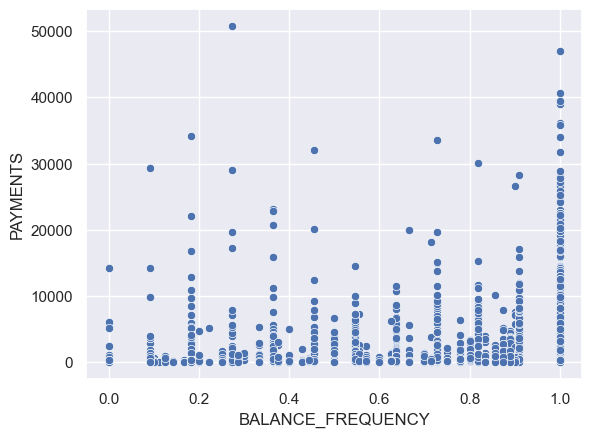

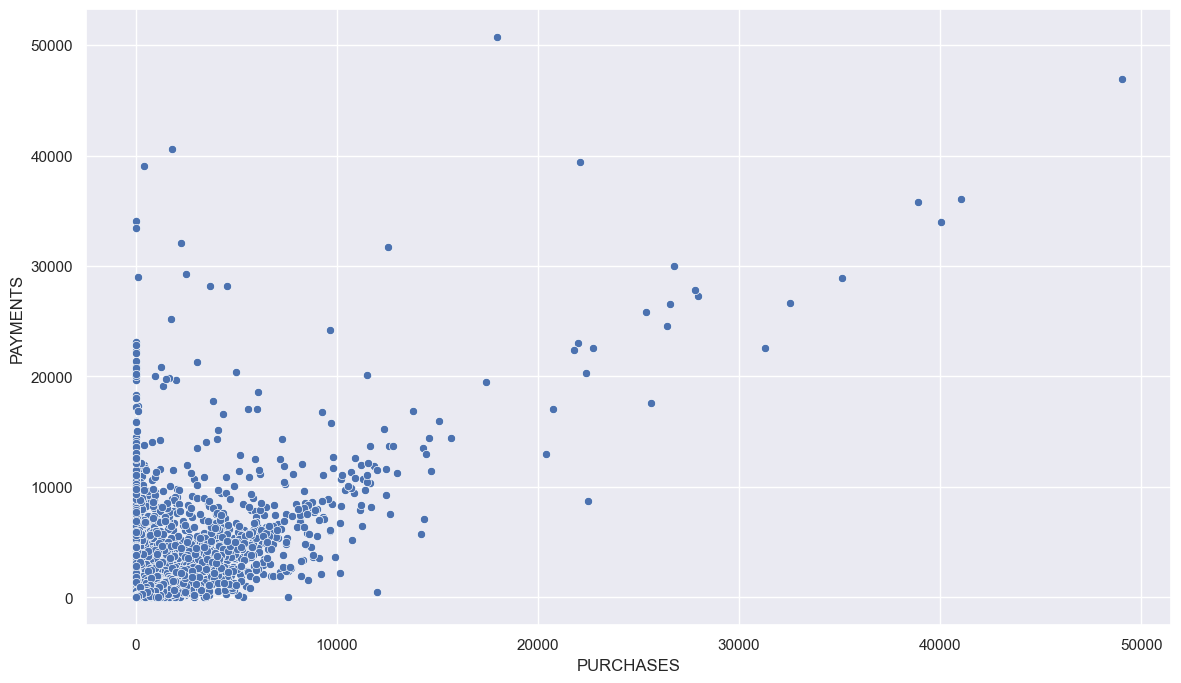

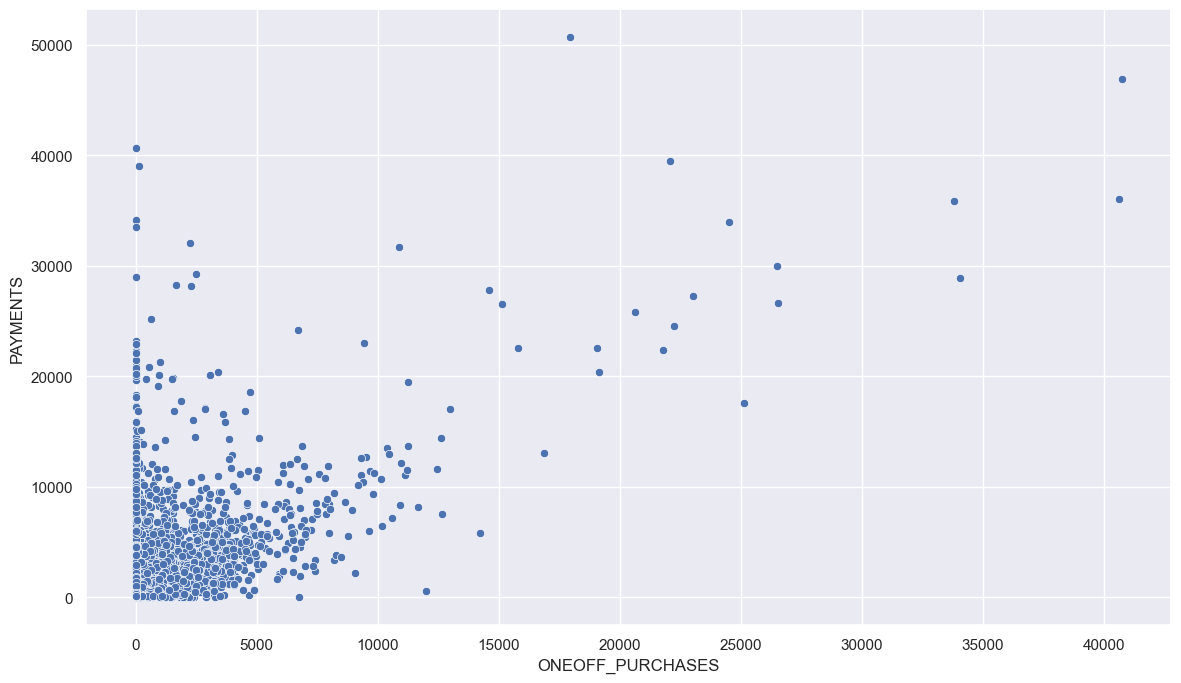

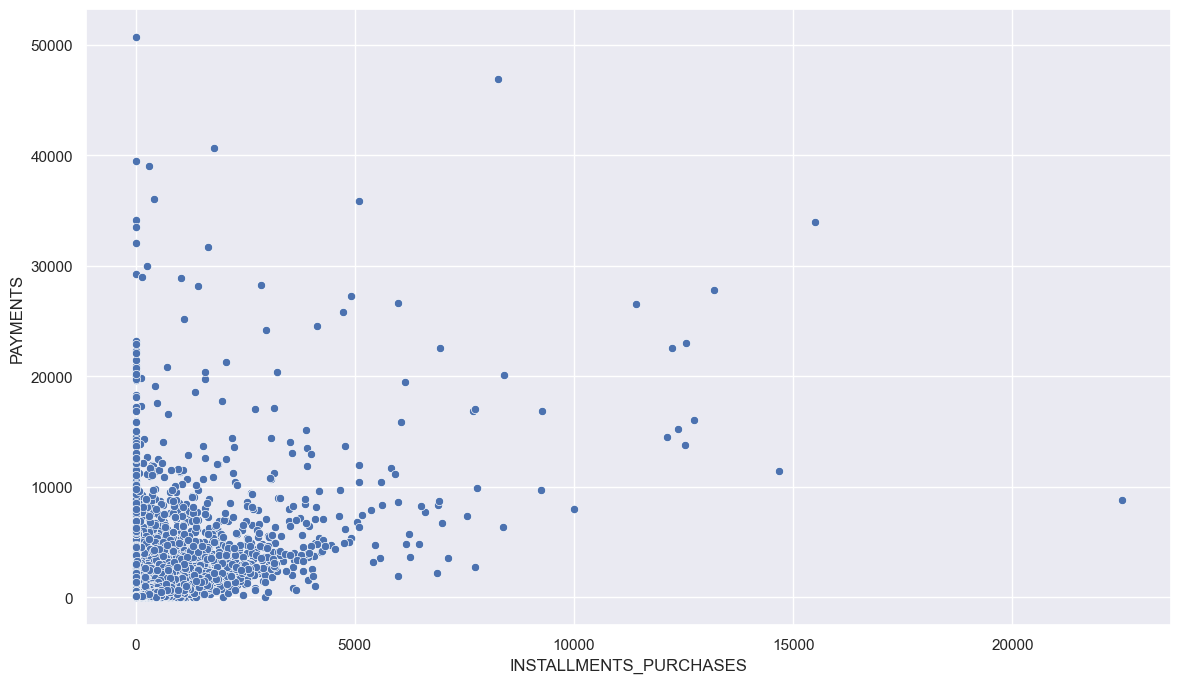

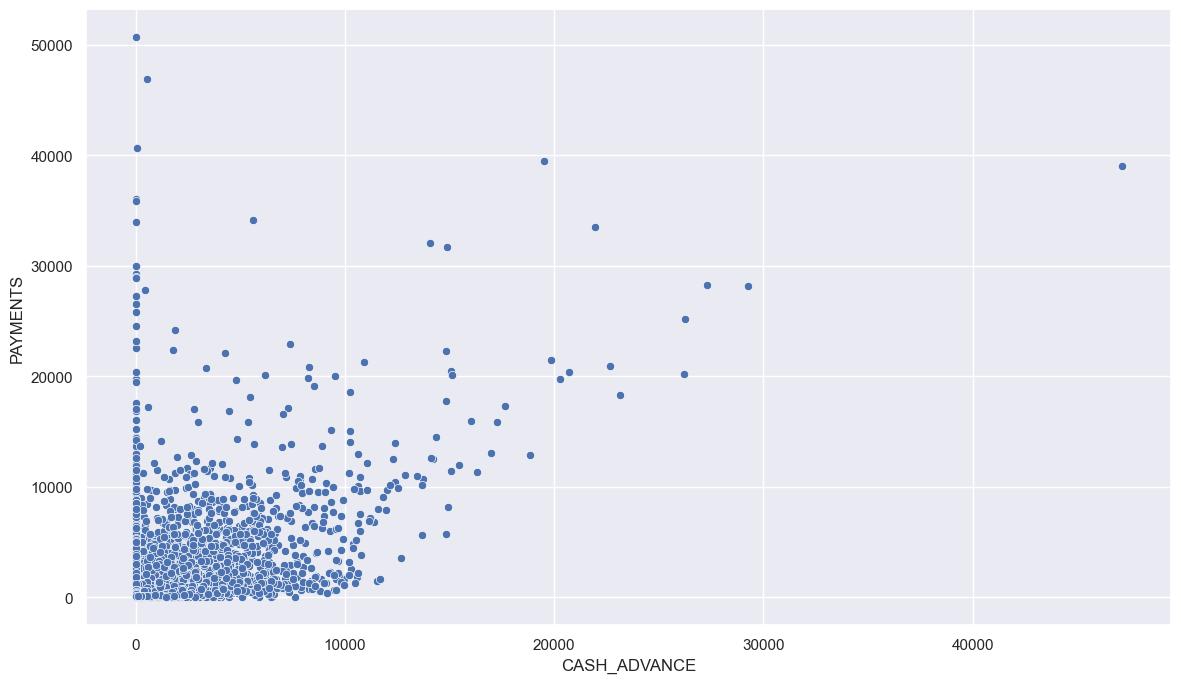

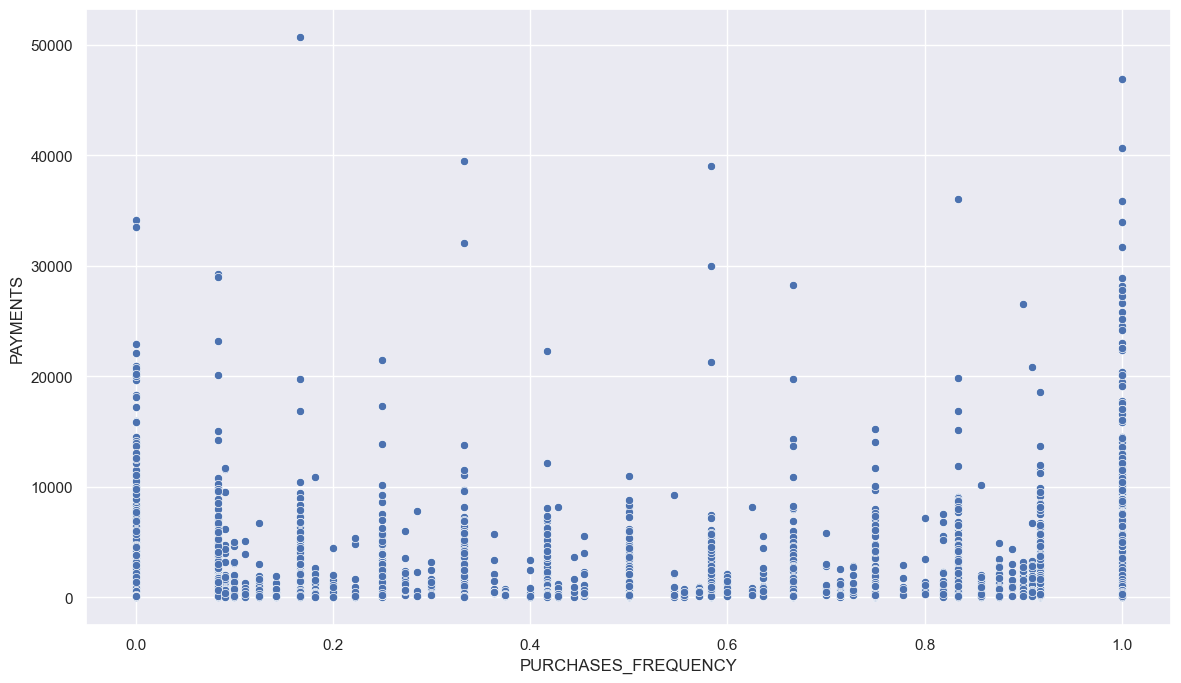

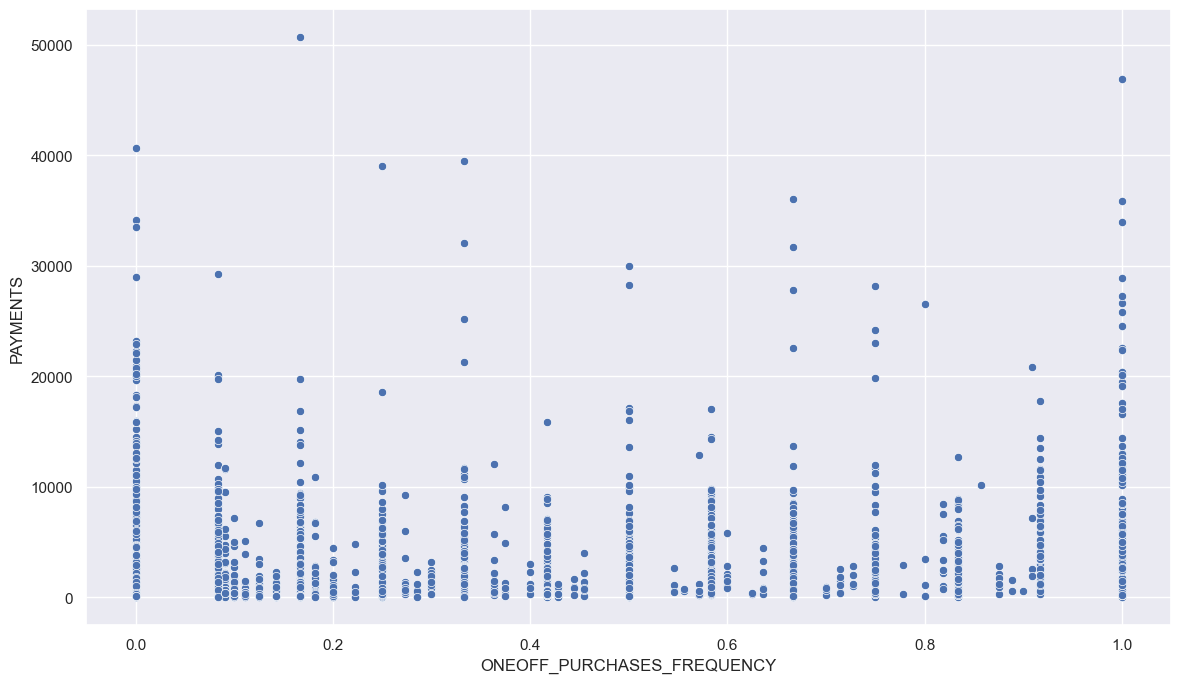

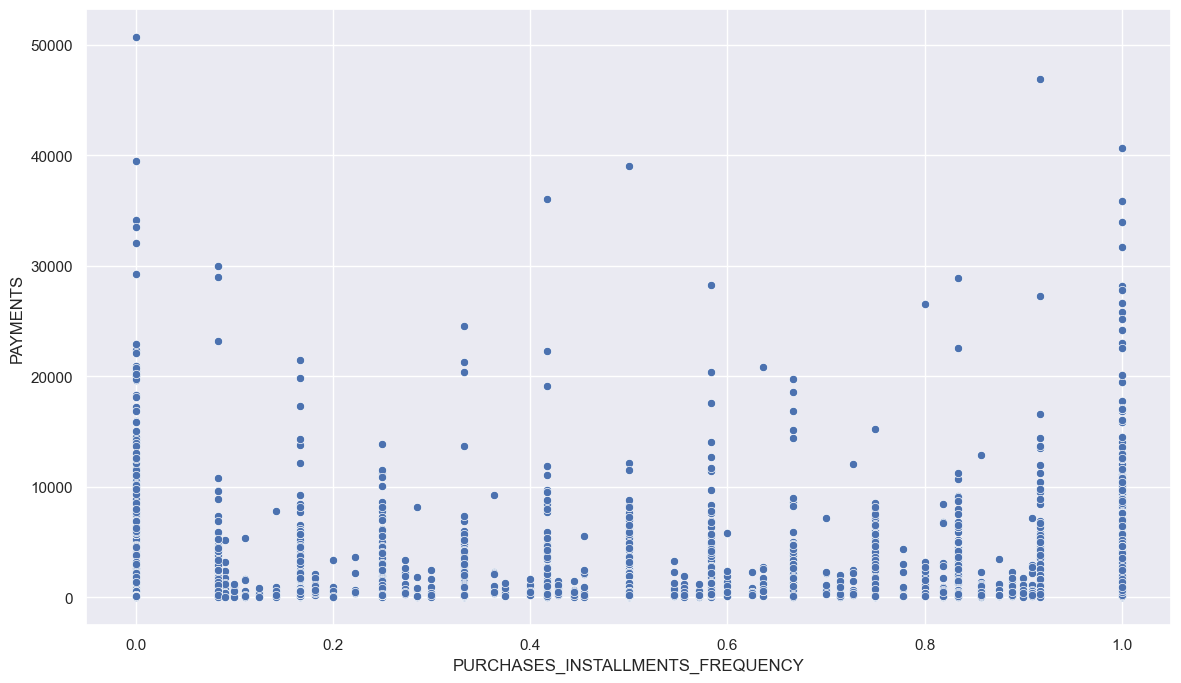

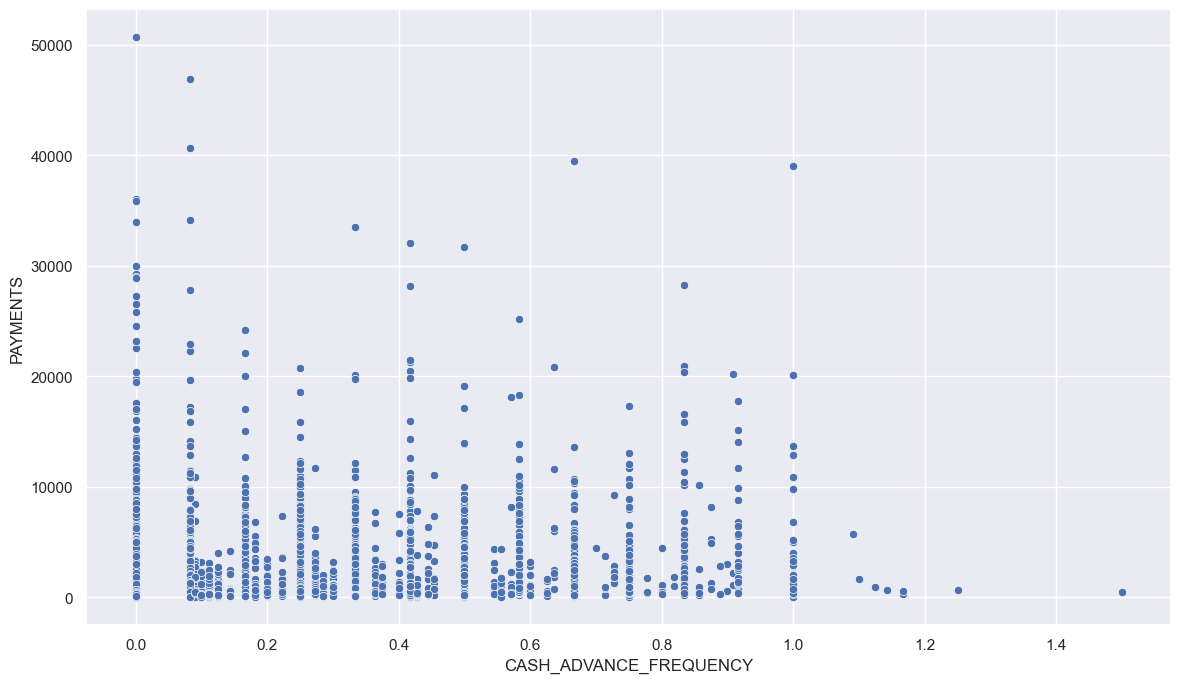

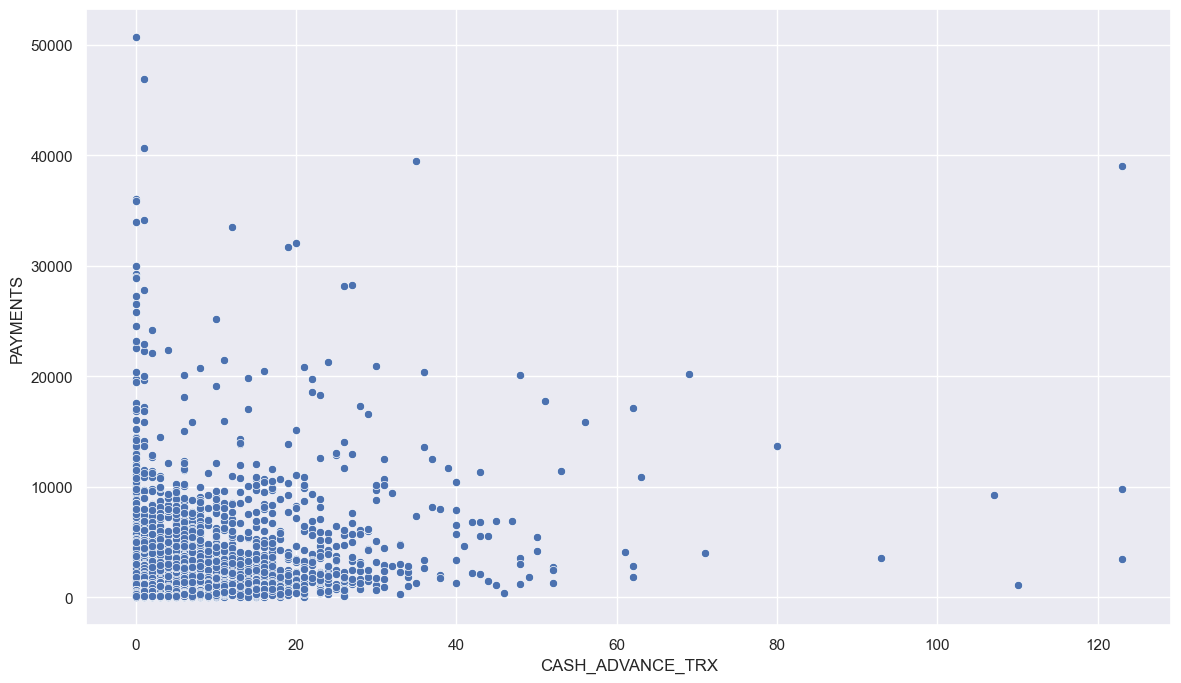

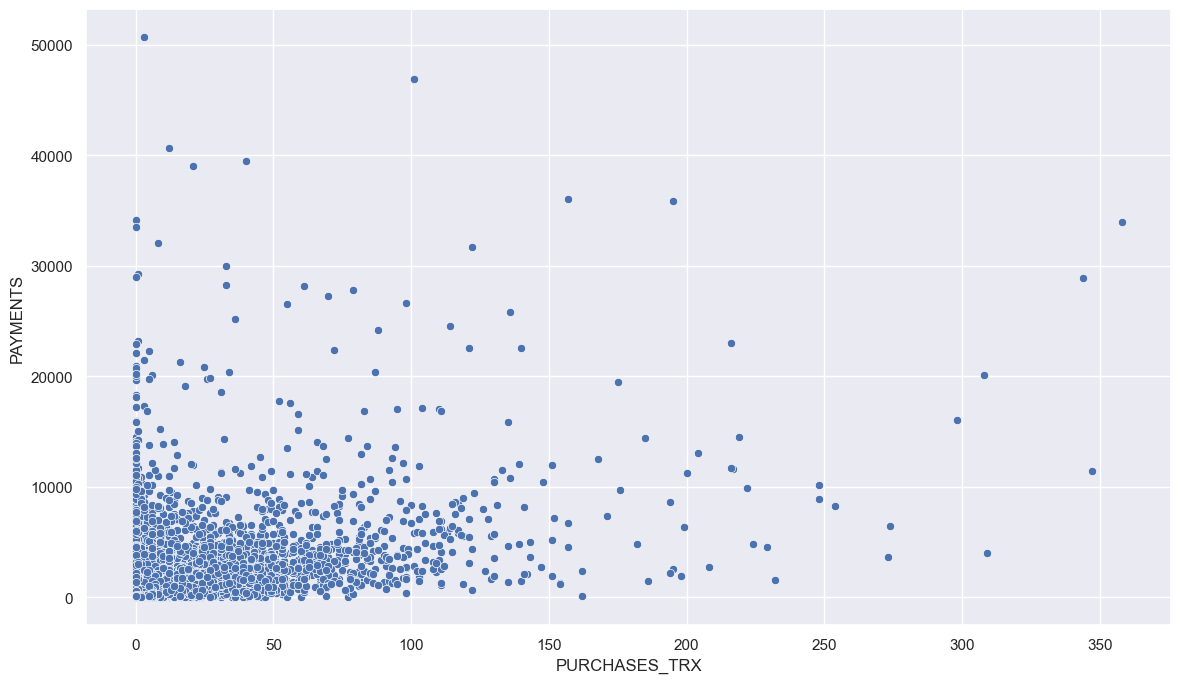

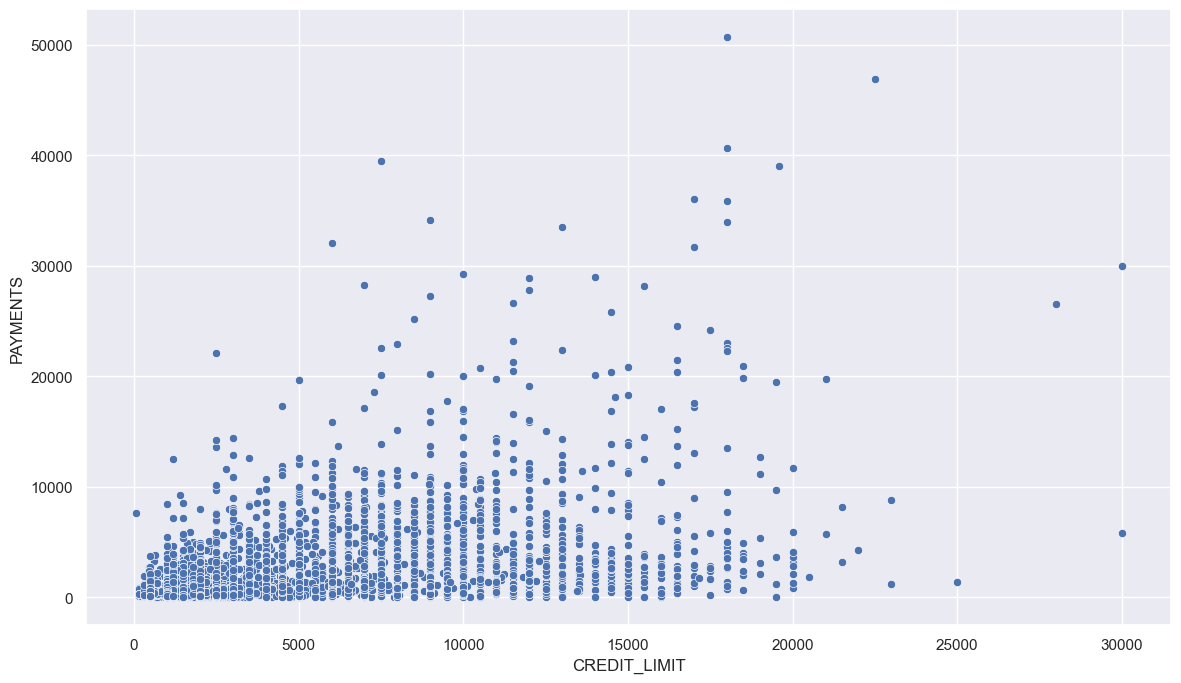

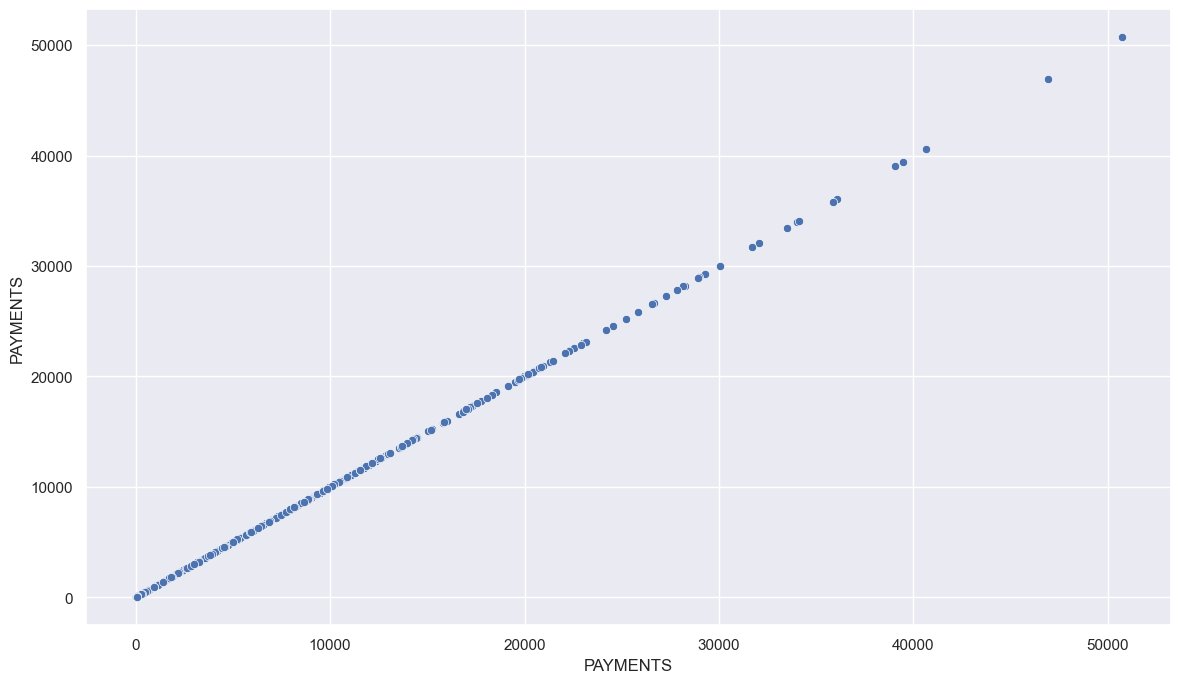

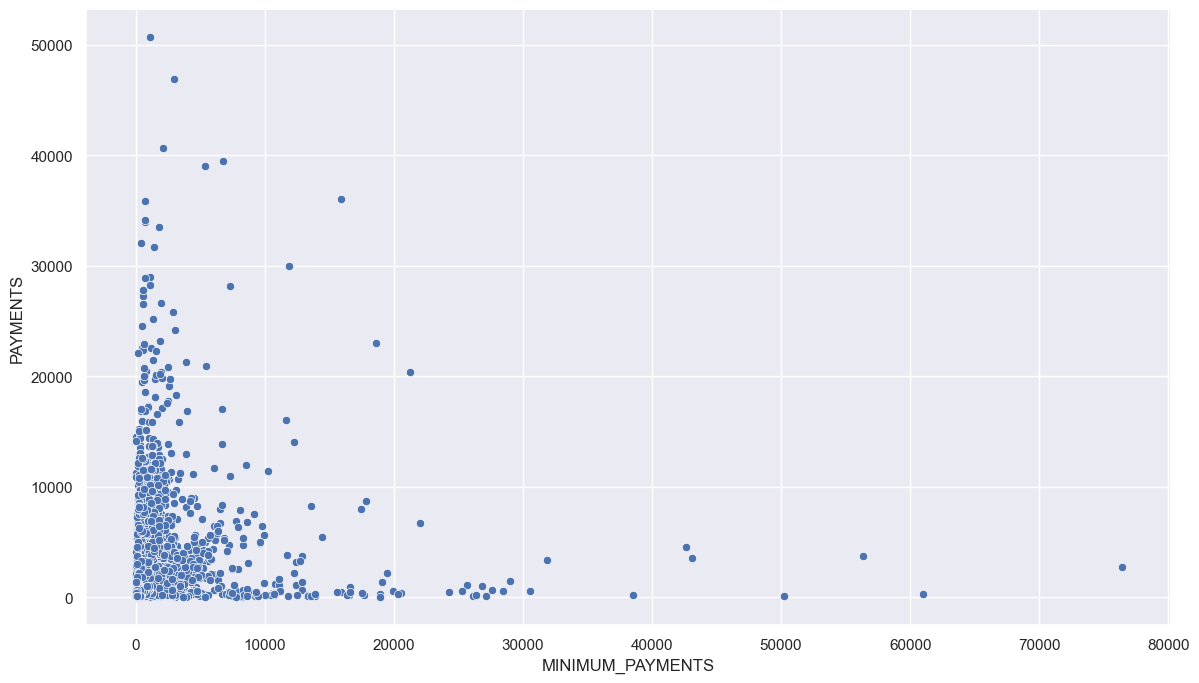

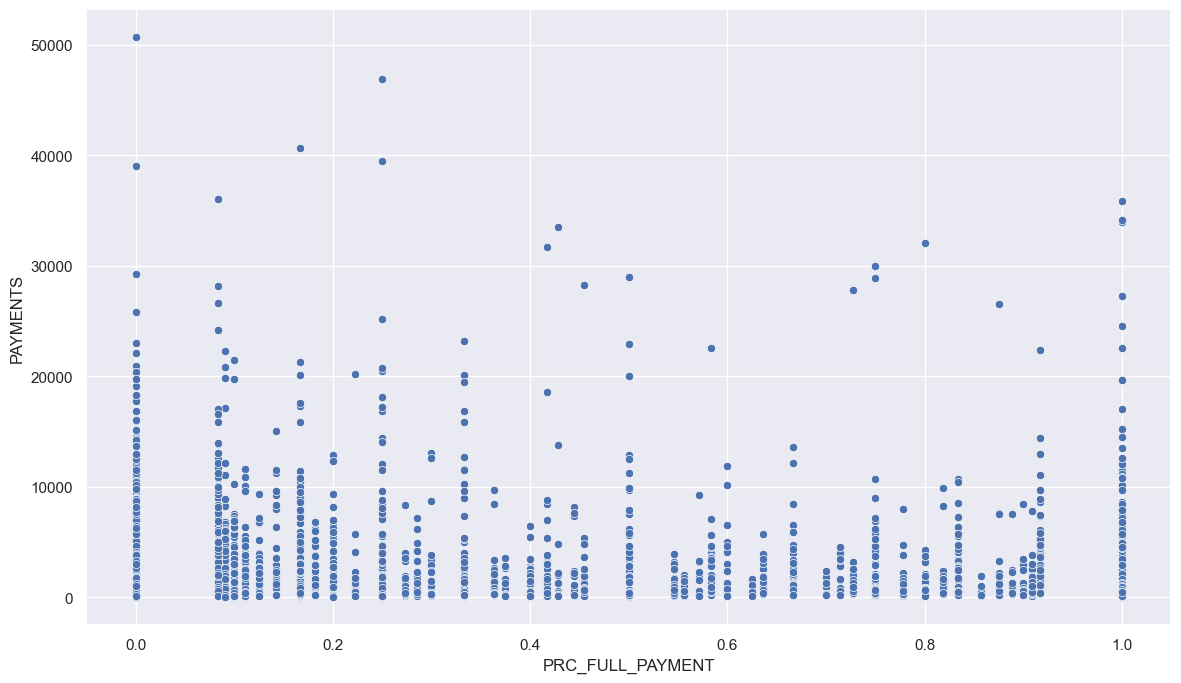

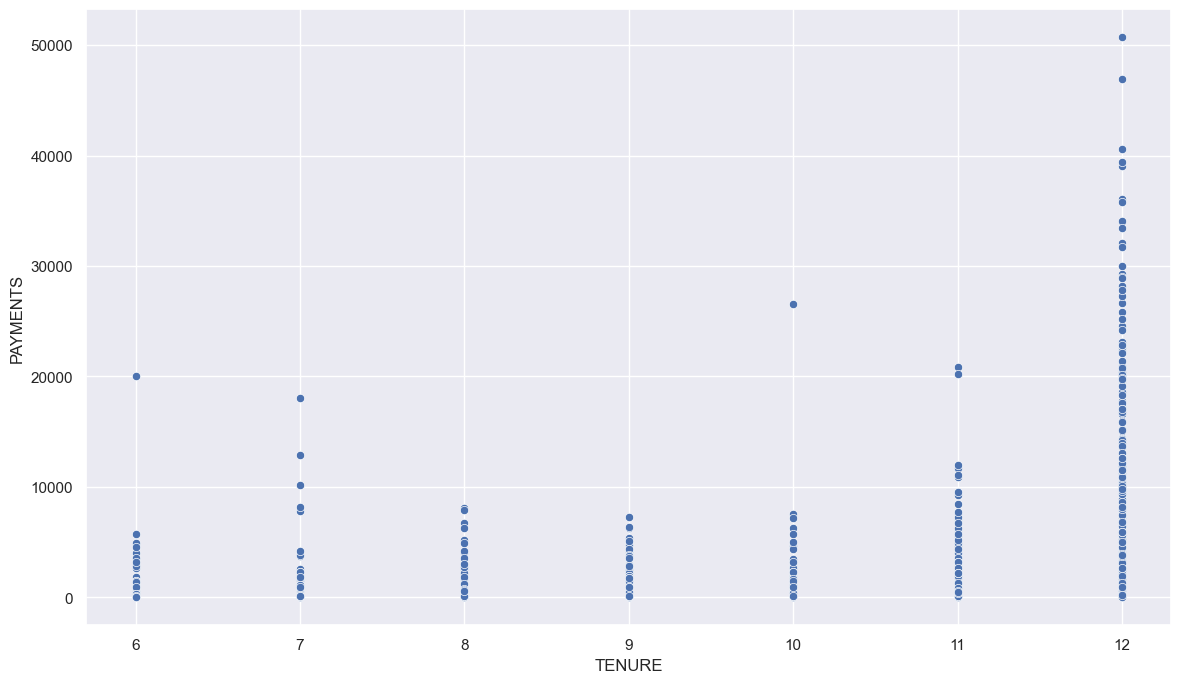

In [10]:
for col in data.columns[2:]:
    sns.scatterplot(x=col, y='PAYMENTS', data=data) 
    sns.set(rc={'figure.figsize':(10, 6)})
    plt.show()

Построим матрицу корреляций

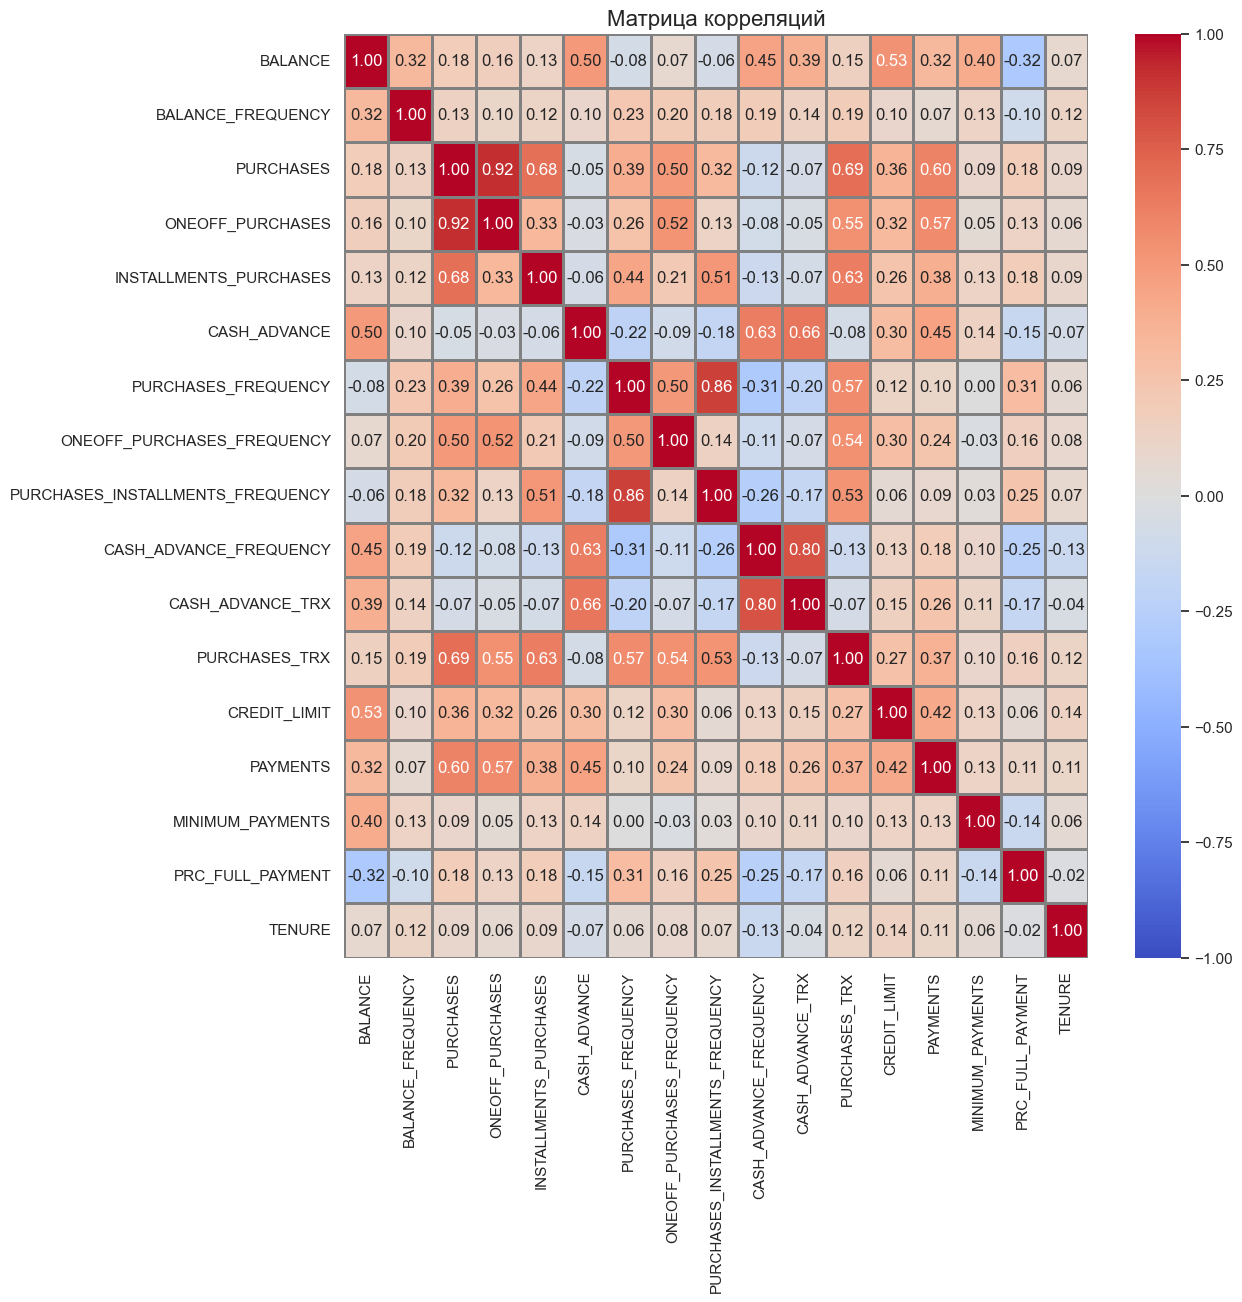

In [11]:
cm = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, fmt='.2f', vmin=-1, annot = True, linewidths=1, linecolor='gray', cmap='coolwarm')
plt.title('Матрица корреляций', fontsize = 16)
#plt.ylabel('Признаки', fontsize=15)
#plt.xlabel('Признаки', fontsize=15)
plt.show()

Удалим `NaN` из датасета

In [12]:
data_clean = data.drop(['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'], axis=1)

Обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов

Для создания рабочей модели необходимо удалить колонку `CUST_ID`


In [13]:
X = data_clean.drop(['CUST_ID'], axis=1)
y = data_clean['CUST_ID']

Разделим данные на признаки (матрица X) и целевую переменную (y)

In [14]:
# обязательная стандартизация данных перед работой с алгоритмами 
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу расстояний функцией `linkage()`на стандартизованной матрице признаков, нарисовам дендрограмму

In [15]:
linked = linkage(X_sc, method = 'ward')

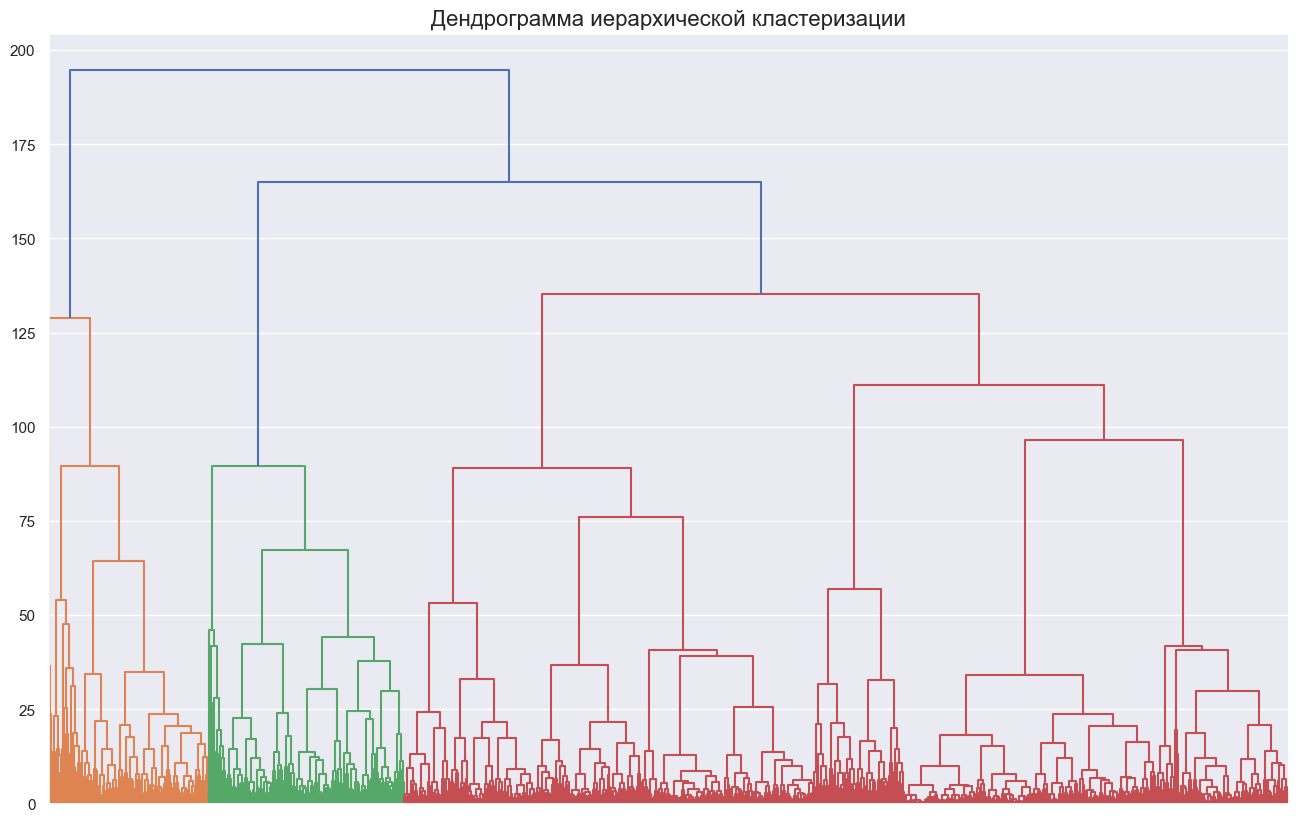

In [16]:
plt.figure(figsize=(16, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Дендрограмма иерархической кластеризации', fontsize=16)
plt.show() 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов

Определим оптимальное число кластеров

In [17]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
#X = load_iris().data
#y = load_iris().target 
for n_cluster in range(2, 15): 
    kmeans = KMeans(n_clusters=n_cluster).fit(X_sc) 
    label = kmeans.labels_ 
    sil_coeff = silhouette_score(X_sc, label, metric='euclidean').round(5)
    print("Для n_clusters={}, Коэффициент силуэта равен {}".format(n_cluster, sil_coeff))

Для n_clusters=2, Коэффициент силуэта равен 0.2287
Для n_clusters=3, Коэффициент силуэта равен 0.20787
Для n_clusters=4, Коэффициент силуэта равен 0.21943
Для n_clusters=5, Коэффициент силуэта равен 0.21394
Для n_clusters=6, Коэффициент силуэта равен 0.23007
Для n_clusters=7, Коэффициент силуэта равен 0.24528
Для n_clusters=8, Коэффициент силуэта равен 0.25304
Для n_clusters=9, Коэффициент силуэта равен 0.24185
Для n_clusters=10, Коэффициент силуэта равен 0.24041
Для n_clusters=11, Коэффициент силуэта равен 0.24349
Для n_clusters=12, Коэффициент силуэта равен 0.22193
Для n_clusters=13, Коэффициент силуэта равен 0.22807
Для n_clusters=14, Коэффициент силуэта равен 0.21469


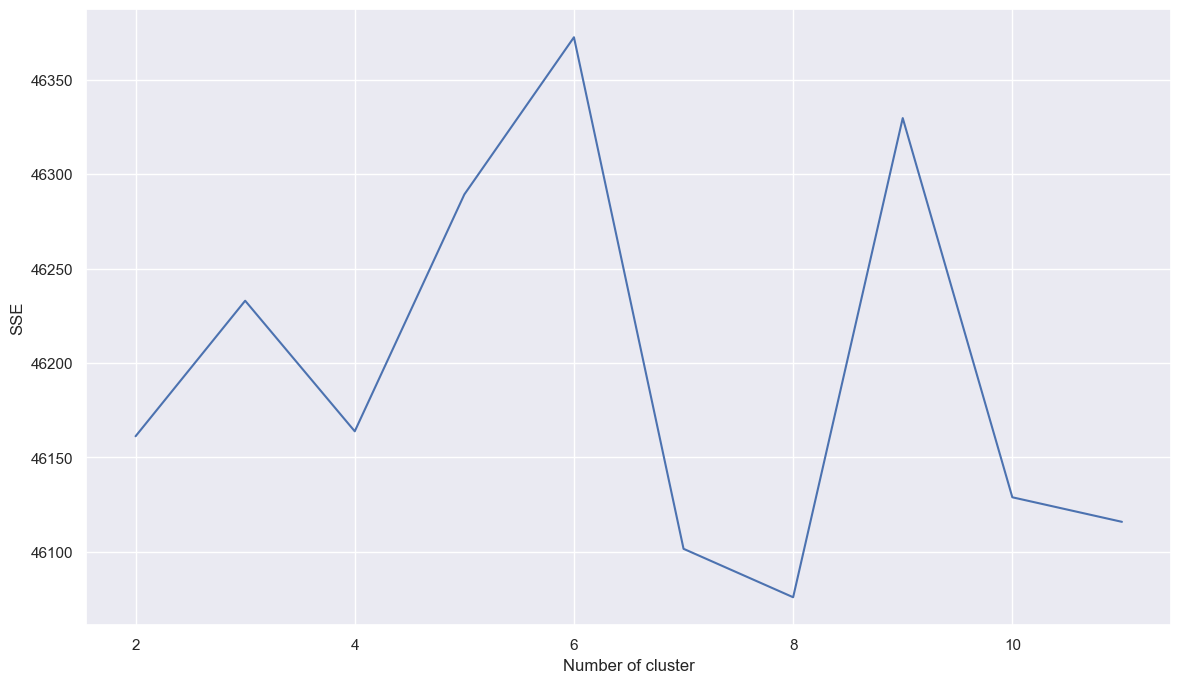

In [18]:
iris = load_iris()
#X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
#data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

sse = {}
for k in range(2, 12):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_sc) 
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/sna/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



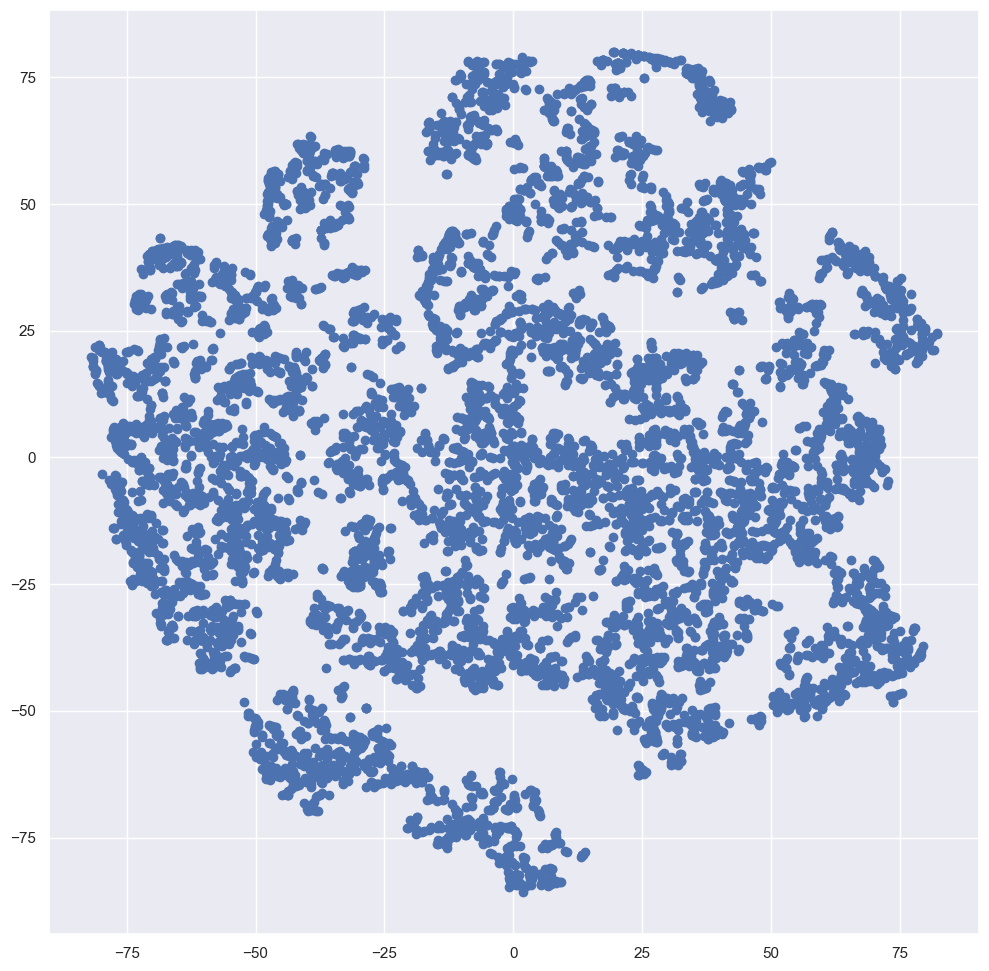

In [19]:

tsne = TSNE(random_state=15)
tsne_representation = tsne.fit_transform(X_sc)
plt.figure(figsize=(12, 12))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

За число кластеров примем `n=3`

In [20]:
n = 3
km = KMeans(n_clusters = n, random_state=0) # задаём число кластеров,
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [21]:
# сохраняем метки кластера в поле нашего датасета
data_clean['cluster_km'] = labels

Характеризуем отделимость кластера от других
* Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация

In [22]:
silhouette_score(X_sc, labels).round(5)

0.20809

Отобразим средние значения признаков кластеров

In [23]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = data_clean.groupby('cluster_km').mean().round(0).T
clusters

cluster_km,0,1,2
BALANCE,3583.0,1956.0,844.0
BALANCE_FREQUENCY,1.0,1.0,1.0
PURCHASES,6725.0,254.0,1094.0
ONEOFF_PURCHASES,4418.0,202.0,526.0
INSTALLMENTS_PURCHASES,2309.0,52.0,568.0
CASH_ADVANCE,1434.0,1597.0,209.0
PURCHASES_FREQUENCY,1.0,0.0,1.0
ONEOFF_PURCHASES_FREQUENCY,1.0,0.0,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,1.0,0.0,1.0
CASH_ADVANCE_FREQUENCY,0.0,0.0,0.0


Определим статистическую значимость различий в средней выручке между кластерами

Применим критерий и отформатируем `p-value`, округлив его до трёх знаков после запятой:

- `Н0` - Статистически значимых различий в `PURCHASES` нет
- `Н1` - Статистически значимые различия в `PURCHASES` есть


Объявим переменные `cluster` в соответствии с их `PURCHASES` значениями

In [24]:
cluster0 = data_clean.query('cluster_km==0')['PURCHASES']
cluster1 = data_clean.query('cluster_km==1')['PURCHASES']
cluster2 = data_clean.query('cluster_km==2')['PURCHASES']
#cluster3 = data_clean.query('cluster_km==3')['PURCHASES']
#cluster4 = data_clean.query('cluster_km==4')['PURCHASES']




Проведем тест «U-критерий Манна-Уитни»

In [25]:
alpha = 0.05 #критический уровень статистической значимости 

clusters = [cluster0, cluster1, cluster2]
cluster_list = ['cluster0', 'cluster1', 'cluster2']

bonferroni_alpha = alpha / 3 #произведено 3 сравнений

for index_0 in range(len(clusters)):
    for index_1 in range(index_0+1, len(clusters)):
        p_value = st.mannwhitneyu(clusters[index_0], clusters[index_1], alternative='two-sided')[1]
#        p_value = st.ttest_ind(clusters[index_0], clusters[index_1], equal_var=False, )[1]
#        p_value = st.levene(clusters[index_0], clusters[index_1], )[1]
        
        print('Кластеры', cluster_list[index_0], cluster_list[index_1])
        print('p_value: {:.3f}'.format(p_value))
        print('Покупки группы A: {:.0f}'.format(clusters[index_0].mean()))
        print('Покупки группы B: {:.0f}'.format(clusters[index_1].mean()))
        
        if p_value < bonferroni_alpha:
            print('\033[31m' + 'Отвергаем нулевую гипотезу: разница статистически значима\n'+ '\033[0m')
        else:
            print('\033[32m' + 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя\n'+ '\033[0m')

Кластеры cluster0 cluster1
p_value: 0.000
Покупки группы A: 6725
Покупки группы B: 254
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster0 cluster2
p_value: 0.000
Покупки группы A: 6725
Покупки группы B: 1094
Отвергаем нулевую гипотезу: разница статистически значима

Кластеры cluster1 cluster2
p_value: 0.000
Покупки группы A: 254
Покупки группы B: 1094
Отвергаем нулевую гипотезу: разница статистически значима

